### # Import packages

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from scipy.fftpack import fft   
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

### # Function definition

##### -> Short time Fourier transform

In [2]:
def STFT(df):
    cmap = cm.Purples
    f, t, Zxx = signal.stft(df.tolist(), fs=1)
    plt.figure(figsize=(8,8))
    plt.xlabel("time")
    plt.ylabel("frequence")
    plt.pcolormesh(t, f, np.abs(Zxx), cmap=cmap)    
    plt.title("STFT for " + df.name)
    plt.show()

##### -> Fast Fourier Transform

In [3]:
def FFT(df): 
    #https://www.itread01.com/article/1532154074.html
    y = df.tolist()
    yy=fft(y)      #快速傅立葉變換
    
    yf=abs(yy)    # 取絕對值
    yf1=abs(yy)/len(y)   #歸一化處理
    yf2 = yf1[range(int(len(y)/2))] #由於對稱性，只取一半區間
    
    xf = np.arange(len(y))  # 頻率
    xf1 = xf
    xf2 = xf[range(int(len(y)/2))] #取一半區間        
    
    figure, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,5))
    figure.tight_layout(pad=5)
    
    plt.subplot(221)   
    plt.plot(y) 
    plt.title(df.name)
    
    plt.subplot(222)
    plt.plot(xf,yf,'g')
    plt.title('FFT of '+df.name+' (two sides frequency range)')
    
    plt.subplot(223)
    plt.plot(xf1,yf1,'r')
    plt.title('FFT of '+df.name+' (normalization)')
    
    plt.subplot(224)
    plt.plot(xf2,yf2,'m')
    plt.title('FFT of '+df.name)
       
    plt.show()

## Q1.
## Simulate three random variables with length 1024, following standard Normal, t-distribution (𝑑𝑓 =10), and exponential distribution (rate = 1.6), respectively.

In [4]:
# prepare dataset
length = 1024
dof = 10
rate = 1.6

df = pd.DataFrame({
    "standard normal":np.random.standard_normal(size=length),
    "t-distribution":np.random.standard_t(df = dof, size = length),
    "exponential":np.random.exponential(scale = 1/rate, size=length)
})

df.head()

,standard normal,t-distribution,exponential
0,-0.061677,-0.009840,0.366617
1,-0.074079,0.080181,0.522477
2,0.791643,0.514362,0.589504
3,-0.212976,-0.385816,0.002030
4,-0.513938,-0.449417,0.227372


### (a). Perform FFT (Fast Fourier Transform) over the three random variables and plot the amplitudes

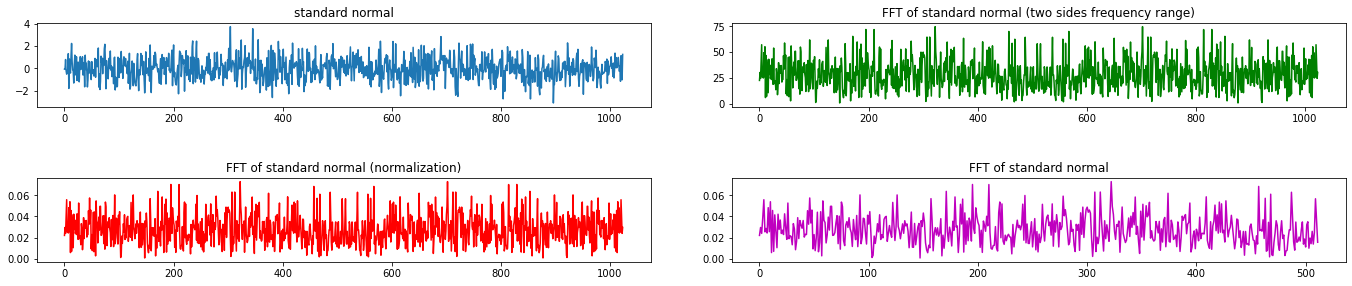

In [5]:
FFT(df["standard normal"])

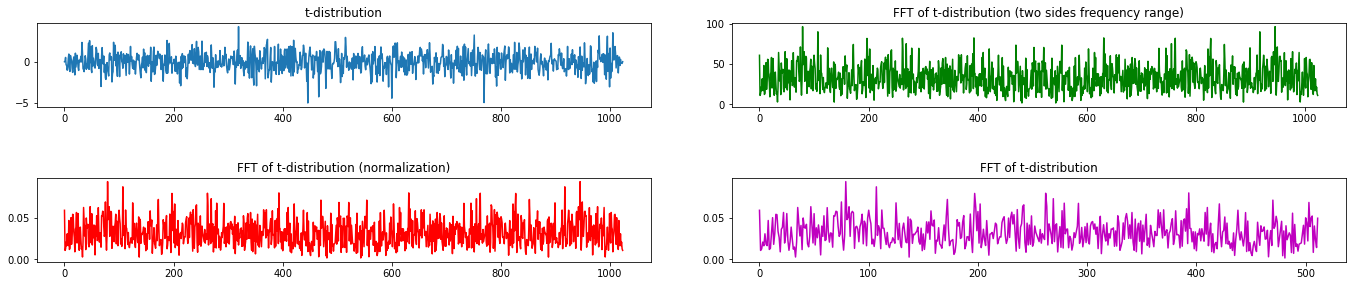

In [6]:
FFT(df["t-distribution"])

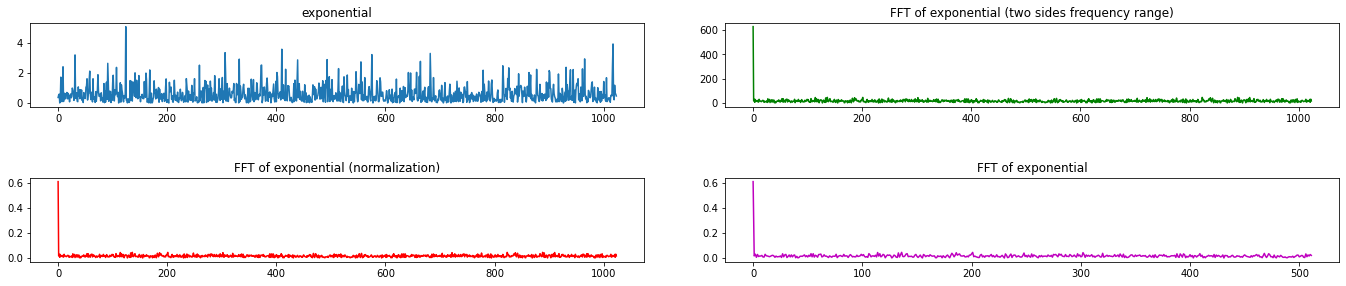

In [7]:
FFT(df["exponential"])

### (b). Perform STFT (Short-Time Fourier Transform) over the three random variables and plot the time-frequency contours.

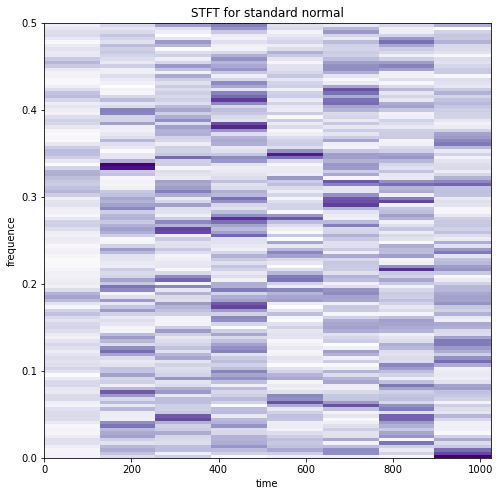

In [8]:
STFT(df["standard normal"])

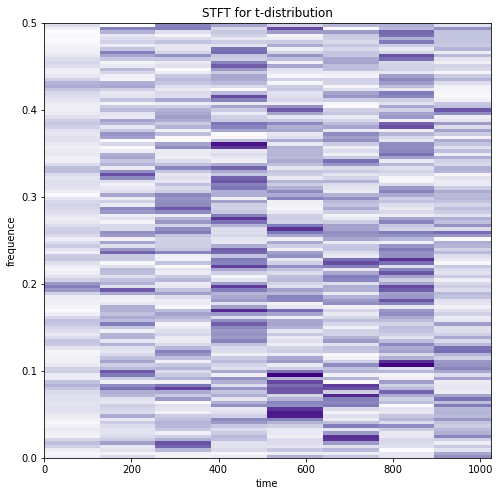

In [9]:
STFT(df["t-distribution"])

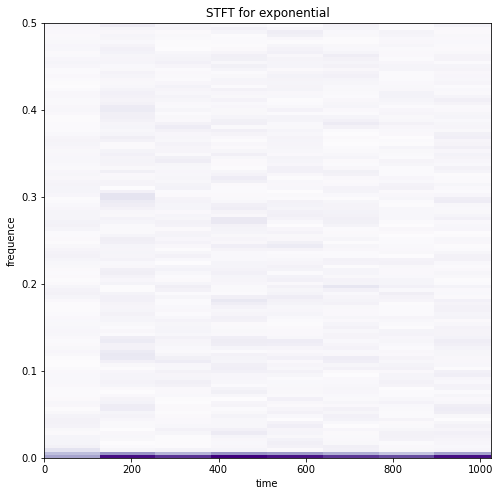

In [10]:
STFT(df["exponential"])

## (c). What do you observe in (a) and (b)?

##### ==> According to FFT plots, we can observe that exponential series unlike standard normal or t-distribution series, by having smaller amplitude. Moreover, in the STFT map, exponential series also having different frequence pattern than the others two series

## Q2.
## Simulate a seasonal time series following the model SARIMA(2, 1, 0) × (0, 1, 1)12.

In [11]:
# prepare dataset
S_ARIMA=sm.tsa.statespace.SARIMAX(endog= np.random.randn(length) ,order=(2,1,0),seasonal_order=(0,1,1,12),
                                  trend='c',enforce_invertibility=False).fit()
results=S_ARIMA.get_prediction(start=length, end=2*length).predicted_mean.tolist()

df = pd.DataFrame({'S_ARIMA(2, 1, 0) × (0, 1, 1)12':  results})

df.head()

,"S_ARIMA(2, 1, 0) × (0, 1, 1)12"
0,-0.482186
1,-0.278478
2,0.058185
3,-0.169155
4,0.040854


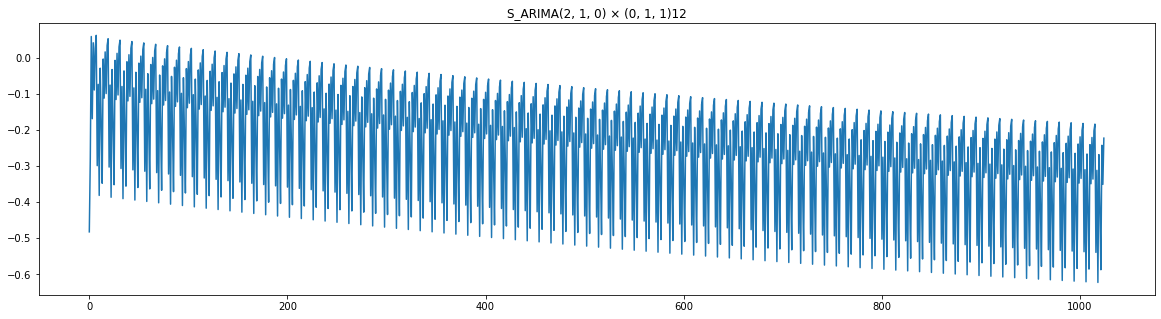

In [12]:
plt.figure(figsize=(20,5))
plt.title('S_ARIMA(2, 1, 0) × (0, 1, 1)12')
plt.plot(results)

## (a). Perform FFT (Fast Fourier Transform) over the time series and plot the amplitudes

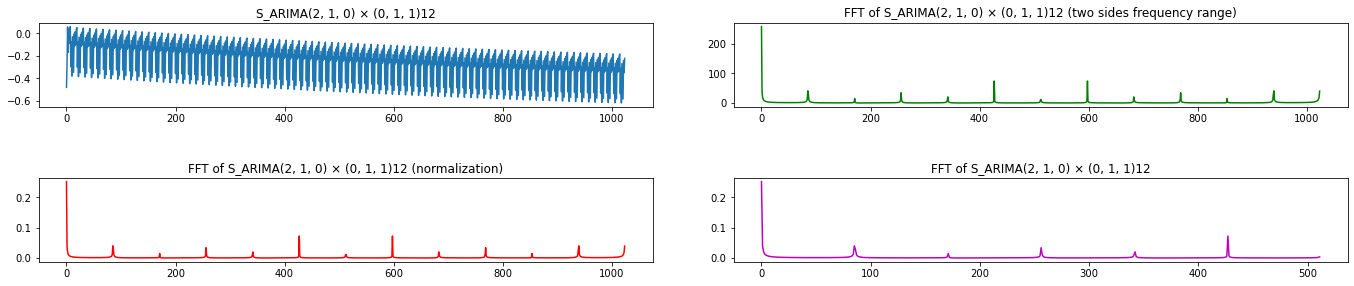

In [13]:
FFT(df['S_ARIMA(2, 1, 0) × (0, 1, 1)12'])

## (b). Perform STFT (Short-Time Fourier Transform) over the time series and plot the time-frequency contours.

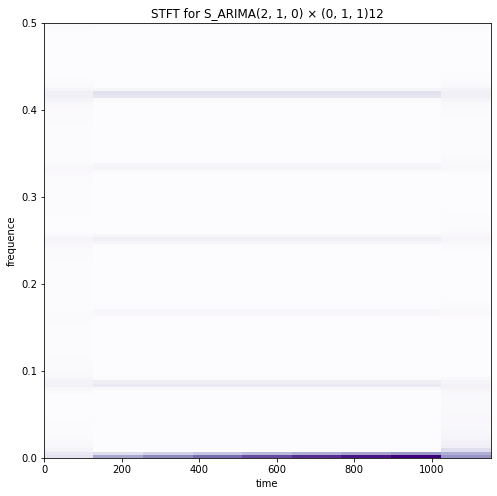

In [14]:
STFT(df['S_ARIMA(2, 1, 0) × (0, 1, 1)12'])

## (c). What do you observe in (a) and (b)?

##### ==> this SARIMA series we generated, show pattern in both FFT plots and STFT map, which behaves alike to the  exponential series in previous problem.